In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
#df = pd.read_csv("Data/responses.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
#df.head()


In [3]:
df = pd.read_csv("Data/personality_traits_adjusted_scale_MOSHER.csv")
#Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
#Drop the null rows
df = df.dropna()
df.head()

In [4]:
adj_heights_features = df[["Funniness", "Loneliness", "Energy_levels", "Knowing_the_right_people", "Eating_to_survive",
                           "Waiting", "Life_struggles", "Appearence_and_gestures", "Self_criticism", "Health"]]

adj_snakes_features = df[["Health", "Public_speaking", "Thinking_ahead", "Getting_angry", "God", "Number_of_friends",
                          "Children"]]

#adj_public_speaking_features = phobia_df[["Health", "God", "New_environment", "Parents_advice", "Appearence_and_gestures",
 #                                  "Assertiveness", "Socializing", "Hypochondria", "Changing_the_past", "Friends_versus_money"]]

#adj_ageing_features = phobia_df[["Health", "Appearence_and_gestures", "God", "Compassion_to_animals", "Cheating_in_school",
 #                         "Life_struggles", "Knowing_the_right_people", "Giving", "Waiting", "Finding_lost_valuables",
  #                        "Empathy", "Judgment_calls"]]

adj_spiders_features = df[["Number_of_friends", "Children", "Life_struggles", "Happiness_in_life", "Public_speaking", 
                           "Questionnaires_or_polls", "Getting_angry", "Appearence_and_gestures", "Getting_up",
                           "Unpopularity"]]

In [5]:
#for col in df.columns: 
 #   print(col) 

In [71]:
#target_names = ["negative", "positive"]
#dummies = pd.get_dummies(df['Gender'])
#y = df['Education']
y = df['Spiders']


In [72]:

gender_features = df[['Prioritising_workload','Writing_notes','Reliability','Keeping_promises','Funniness','Criminal_damage','Compassion_to_animals','Empathy'
               ,'Giving','Eating_to_survive','Mood_swings','Socializing','Life_struggles','Personality','Interests_or_hobbies','Questionnaires_or_polls']]

education_features = df[['Finding_lost_valuables','Personality','Happiness_in_life',
                             'God','Appearence_and_gestures','Waiting','Charity','Cheating_in_school','Borrowed_stuff',
                             'Elections']]



In [73]:
#X = education_features
X = adj_spiders_features
X.head()

,Number_of_friends,Children,Life_struggles,Happiness_in_life,Public_speaking,Questionnaires_or_polls,Getting_angry,Appearence_and_gestures,Getting_up,Unpopularity
0,2,3,1,3,3,2,1,3,1,3
1,2,1,1,3,3,2,3,3,3,3
2,2,3,3,3,1,1,3,2,3,3
3,2,3,1,2,3,2,1,2,3,3
4,2,2,2,2,3,3,2,2,2,3


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.986/0.509
k: 3, Train/Test Score: 0.713/0.444
k: 5, Train/Test Score: 0.614/0.426
k: 7, Train/Test Score: 0.580/0.497
k: 9, Train/Test Score: 0.598/0.527
k: 11, Train/Test Score: 0.560/0.550
k: 13, Train/Test Score: 0.550/0.538
k: 15, Train/Test Score: 0.586/0.521
k: 17, Train/Test Score: 0.549/0.521
k: 19, Train/Test Score: 0.566/0.550


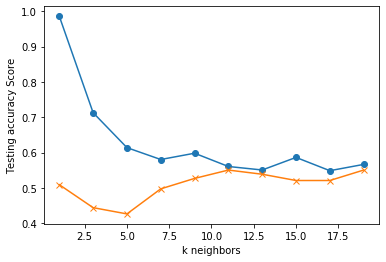

In [75]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [76]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Test Acc: 0.550


In [77]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'models/spiders_KNN_model.sav'
joblib.dump(knn, filename)



['models/spiders_KNN_model.sav']